# Analyse CARD Output
Because CARD output is different with three inputs from glimmer, GeneMark and Prodigal, respectively, we would like to analyse this according to the occurence of each predicted resistant gene.

In [146]:
#import os 
import os


In [64]:
# extract ARO
def get_ARO(filename):
    ARO = []
    try: 
        f = open(filename)
        for line in f:
            ARO.append(line.split('\t')[9])
        return(ARO[1:])
    except IOError:
        print("file" + filename + "does not exist")
    
    # parsing (ARO number; quality)
    close(f)

In [89]:
# gene occurence
import pandas as pd
 
def geneOccur(method, geneList, occur): 
    
    for a in geneList:
        if a in list(occur.columns.values):
            occur.ix[method, a] = 1
        else:
            
            occur[a] = pd.Series([0]*3, index=occur.index)
            occur.ix[method, a] = 1

In [92]:
#loop around all genomes and methods
os.chdir(r'C:\Users\Charl\Google Drive\ResearchProjects\antibiotic discovery\gene prediction\experimentToEvaluate')
methods = ['glimmer', 'prodigal', 'genemark']
genomeID = ['1304918.4.txt',
          '1328440.3.txt',
          '1402497.3.txt',
          '1439316.7.txt',
          '1439318.3.txt',
          '1439320.3.txt']
D = {}
for genome in genomeID:
    occur = pd.DataFrame(index = methods)
    for folder in methods:
        os.chdir(folder + '\\out')
        geneOccur(folder, get_ARO(genome), occur)
        os.chdir('..\..')
        D[genome] = occur

In [147]:
#let's take a look at the dataframe "occur"
occur

,ARO:3000309,ARO:3003576,ARO:3000535,ARO:3002986,ARO:3000216,ARO:3001327,ARO:3003730,ARO:3000421,ARO:3000676,ARO:3000792,...,ARO:3000830,"ARO:3003392, ARO:3003392, ARO:3003392",ARO:3003952,ARO:3000793,ARO:3002120,ARO:3003950,ARO:3003830,ARO:3003841,ARO:3000027,ARO:3003953
glimmer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
prodigal,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
genemark,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1


In [148]:
# all data is saved in a dictionary "D"
# keys = genome_name
# value = dataframe occur corresponding to that genome
D

{'1304918.4.txt':           ARO:3000263  ARO:3000237  ARO:3000491  ARO:3001216  ARO:3000620  \
 glimmer             1            1            1            1            1   
 prodigal            1            1            1            1            1   
 genemark            1            1            1            1            1   
 
           ARO:3001330  ARO:3000216  ARO:3000823  ARO:3000533  ARO:3003952  \
 glimmer             1            1            1            1            1   
 prodigal            1            1            1            1            1   
 genemark            1            1            1            1            1   
 
              ...       ARO:3003308  ARO:3000421  ARO:3002986  ARO:3000825  \
 glimmer      ...                 1            1            1            1   
 prodigal     ...                 1            1            1            1   
 genemark     ...                 1            1            1            1   
 
           ARO:3000316  ARO:3002546  ARO:

In [145]:
#start plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

key = list(D.keys())


# results: plotting as subplot is problematic, ignore this first...

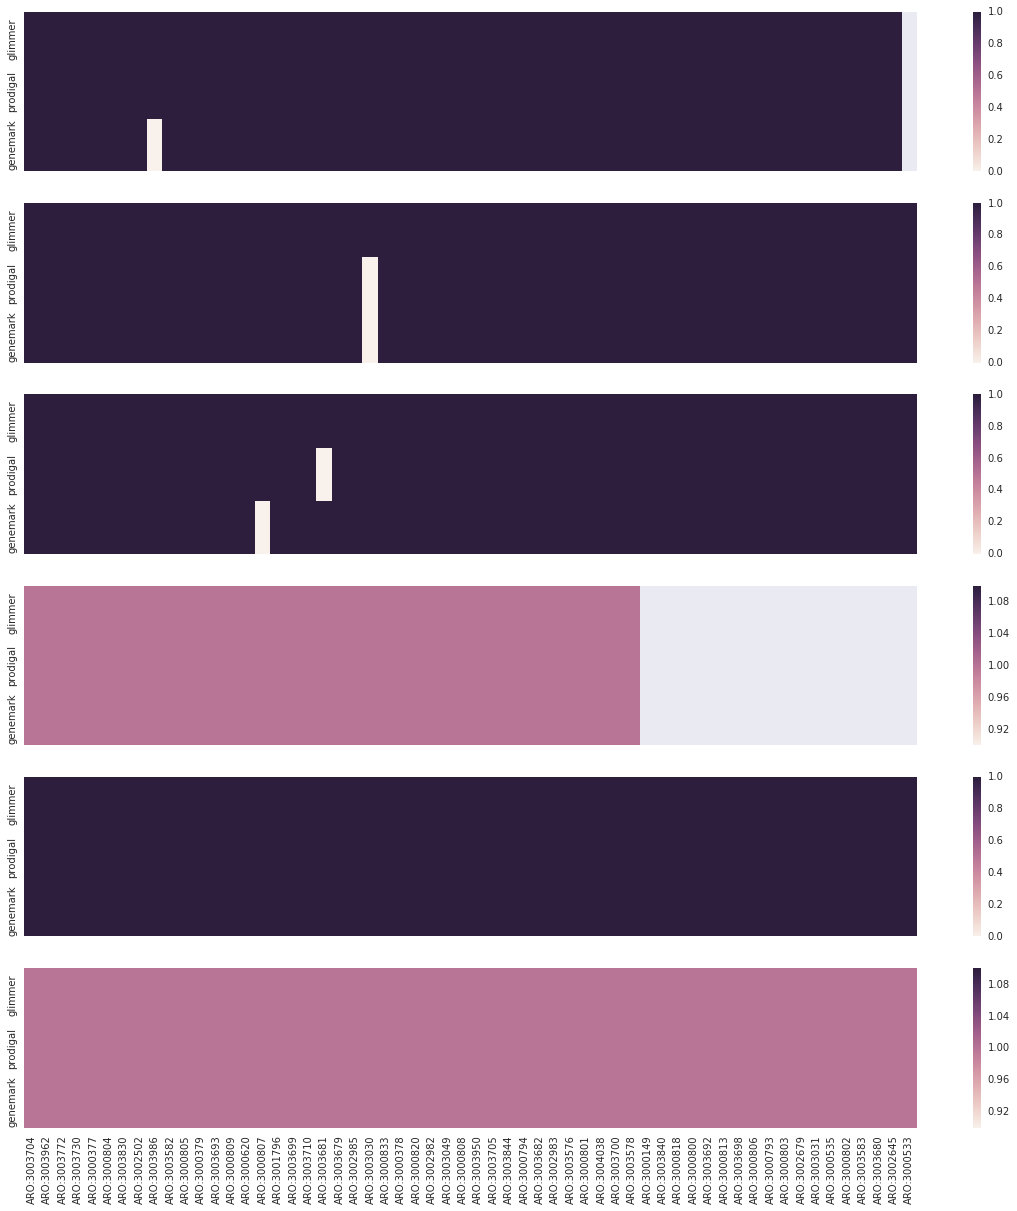

In [138]:
# plotting in subplot is problematic...= =
f, axes = plt.subplots(6, 1, figsize=(20, 20), sharex=True)
sns.despine(left=True)
n = 0
for k in list(D.keys()):
    axx = sns.heatmap(D[k], ax = axes[n])
    axx.set_title = k
    n = n+1

# Results: individual plotting:
## genome_ID = 1439320.3
organism: Enterobacter aerogene

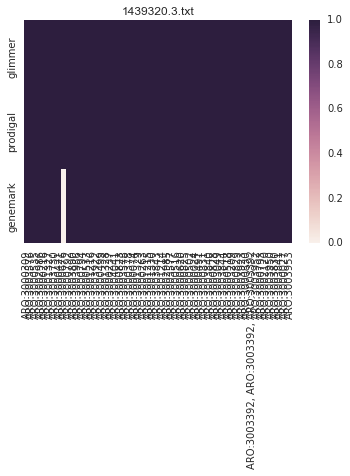

In [144]:
df = D[key[0]]
ax = sns.heatmap(df)
ax.set_title(key[0])

## genome_ID = 1304918.4
organism: Klebsiella pneumoniae

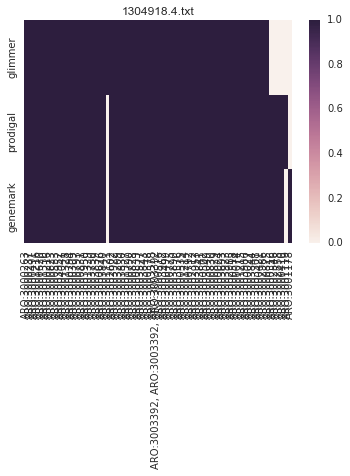

In [141]:
df = D[key[1]]
ax = sns.heatmap(df)
ax.set_title(key[1])

## genome_ID: 1328440.3
organism: E.coli

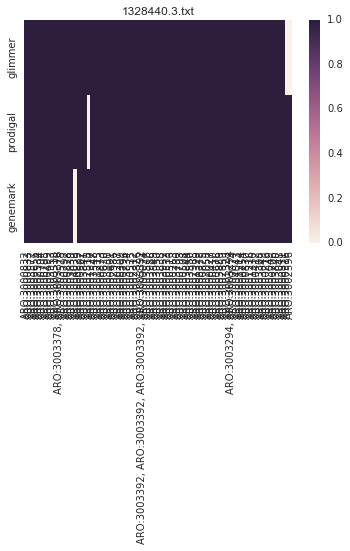

In [140]:
df = D[key[2]]
ax = sns.heatmap(df)
ax.set_title(key[2])

## genome_ID: 1439316.7
organism: AB

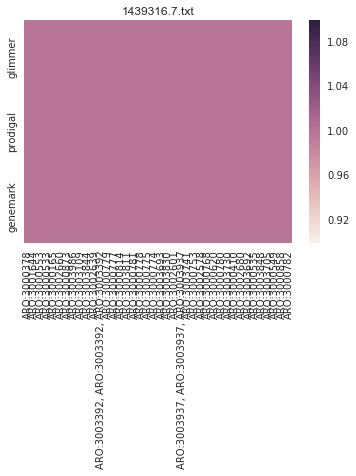

In [139]:
df = D[key[3]]
ax = sns.heatmap(df)
ax.set_title(key[3])

## genome_ID: 1439318.3
organism: Citrobacter

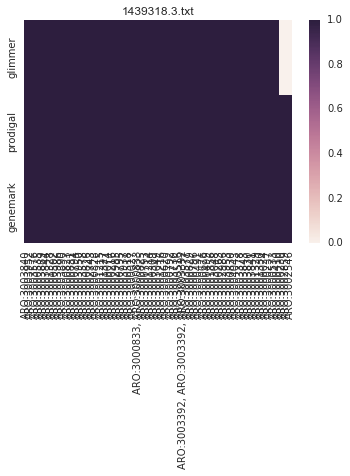

In [137]:
df = D[key[4]]
ax = sns.heatmap(df)
ax.set_title(key[4])

## genome_ID: 1402497
organism: psuedomonas

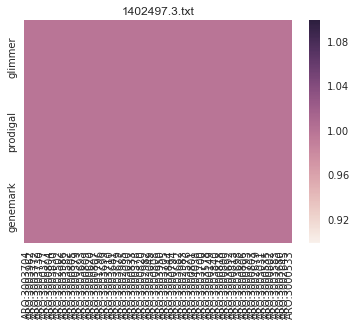

In [142]:
df = D[key[5]]
ax = sns.heatmap(df)
ax.set_title(key[5])